### Set up environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [16]:
def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]

    # Compute the cumulative distribution function (CDF) using the histogram
    # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
    # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
    # np.cumsum(): Compute the cumulative sum of the products
    # cdf: The cumulative distribution function values
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf
    
    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres, bin_edges[1:]

# Function to calculate PDF from a single file
def calculate_pdf_wetvalues (precipitation_data,bins_i_want, filter_small_vals=False ):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]
    
    freqs, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    # I think this was just for knowing how many value was in each bin
    # How was I using that in log_discrete_histogram_less_legend???
    # freqs_numbers, bin_edges = np.histogram(precipitation_data, bins= bins, density=False)
    
    # Find the centre point of each bin for plotting
    bin_centres =  0.5*(bin_edges[1:] + bin_edges[:-1])    
    
    return freqs, bin_centres

def plot_ccdf(axs,results,colors):
    for num, result in enumerate(results):
        axs.scatter(result[3], result[1] ,linewidth = 1,s=3, color = colors[num])
        axs.plot(result[3],result[1] ,linewidth = 1, color = colors[num])
        
# Function to filter patches based on included colors
def create_patches(included_colors):
    return [mpatches.Patch(color=color, label=label) 
            for color, label in labels_and_colors if color in included_colors]     

labels_and_colors = [
    ('black', 'CEH-GEAR'),
    ('darkorange', 'UKCP18 (hourly)'),
    ('purple', 'UKCP18 (30 mins)'),
    ('green', 'NIMROD (30 mins)')]

### Get model data for overlapping and not overlapping time periods

In [35]:
# ukcp18_hrly_2001_2014_jja_GB_2km = np.load('/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/ukcp18_hrly_2001_2014_2.2km_bng_masked_GB_jja.npy')
ukcp18_hrly_2001_2019_jja_GB_2km = np.load('/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/ukcp18_hrly_2001_2019_2.2km_bng_regridded_12km_masked_GB_jja.npy')
# ukcp18_hrly_2006_2019_jja_GB_2km = np.load('/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/ukcp18_hrly_2006_2019_2.2km_bng_regridded_12km_masked_GB_jja.npy')

In [7]:
resolution = '2.2km_regridded'
cehgear_1990_2014_GB_jja_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/CEH-GEAR/cehgear_1990-2014_{resolution}_GB_jja.npy')
# cehgear_2001_2014_GB_jja_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/CEH-GEAR/cehgear_2001-2014_{resolution}_GB_jja.npy')

In [ ]:
resolution = '2.2km_bng_masked'
# ukcp18_30m_2001_2014_jja_GB_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/ukcp18_30m_2001_2014_{resolution}_jja_GB.npy')
ukcp18_30m_2001_2019_jja_GB_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/ukcp18_30m_2001_2019_{resolution}_jja_GB.npy')
# ukcp18_30m_2006_2019_jja_GB_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/ukcp18_30m_2006_2019_{resolution}_jja_GB.npy')

In [9]:
resolution = "NIMROD_regridded_2.2km"
NIMROD_2006_2019_jja_GB_2km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/NIMROD_2006_2019_{resolution}_jja_GB.npy')

## Calculate CDFs and CCDFs

In [10]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35,50]
low_bins_i_want = [0, 0.1,  0.95, 1.05, 1.15,2]

## UKCP18 hrly vs UKCP18 30 mins vs NIMROD : 2006-2019

In [10]:
# ukcp18_hrly_cdf, ukcp18_hrly_ccdf, ukcp18_hrly_bin_centres, ukcp18_hrly_bin_edges = calculate_ccdf_wetvalues(ukcp18_hrly_2006_2019_jja_GB,bins_i_want)
# ukcp18_30mins_cdf, ukcp18_30mins_ccdf, ukcp18_30mins_bin_centres, ukcp18_30mins_bin_edges = calculate_ccdf_wetvalues(ukcp18_30m_2006_2019_jja_GB, bins_i_want)
# nimrod_cdf, nimrod_ccdf, nimrod_bin_centres, nimrod_bin_edges = calculate_ccdf_wetvalues(NIMROD_2006_2019_jja_GB,bins_i_want)

In [11]:
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
# axs[0].scatter(ukcp18_hrly_bin_edges, ukcp18_hrly_cdf ,linewidth = 1,s=3, color = 'darkorange')
# axs[0].plot(ukcp18_hrly_bin_edges,ukcp18_hrly_cdf ,linewidth = 1, color = 'darkorange')
# axs[0].scatter(ukcp18_30mins_bin_edges, ukcp18_30mins_cdf ,linewidth = 1,s=3, color = 'purple')
# axs[0].plot(ukcp18_30mins_bin_edges,ukcp18_30mins_cdf ,linewidth = 1, color = 'purple')
# axs[0].scatter(nimrod_bin_edges, nimrod_cdf ,linewidth = 1,s=3, color = 'green')
# axs[0].plot(nimrod_bin_edges, nimrod_cdf ,linewidth = 1, color = 'green')
# axs[0].set_title('CDF')

# axs[1].scatter(ukcp18_hrly_bin_edges, ukcp18_hrly_ccdf ,linewidth = 1,s=3, color = 'darkorange')
# axs[1].plot(ukcp18_hrly_bin_edges,ukcp18_hrly_ccdf ,linewidth = 1, color = 'darkorange')
# axs[1].scatter(ukcp18_30mins_bin_edges, ukcp18_30mins_ccdf ,linewidth = 1,s=3, color = 'purple')
# axs[1].plot(ukcp18_30mins_bin_edges,ukcp18_30mins_ccdf ,linewidth = 1, color = 'purple')
# axs[1].scatter(nimrod_bin_edges, nimrod_ccdf ,linewidth = 1,s=3, color = 'green')
# axs[1].plot(nimrod_bin_edges, nimrod_ccdf ,linewidth = 1, color = 'green')
# axs[1].set_yscale('log')
# # axs[1].set_xlim(0,80)
# # axs[1].set_ylim(1e-7,1)
# axs[1].set_title('CCDF')

# axs[1].legend(handles=patches);

## UKCP18 hrly vs UKCP18 30 mins vs CEH-GEAR : 2001-2014

In [11]:
cehgear_cdf, cehgear_ccdf, cehgear_bin_centres, cehgear_bin_edges = calculate_ccdf_wetvalues(cehgear_2001_2014_GB_jja, bins_i_want)
ukcp18_hrly_cdf, ukcp18_hrly_ccdf, ukcp18_hrly_bin_centres, ukcp18_hrly_bin_edges = calculate_ccdf_wetvalues(ukcp18_hrly_2001_2014_jja_GB,bins_i_want)
ukcp18_30mins_cdf, ukcp18_30mins_ccdf, ukcp18_30mins_bin_centres, ukcp18_30mins_bin_edges = calculate_ccdf_wetvalues(ukcp18_30m_2001_2014_jja_GB, bins_i_want)

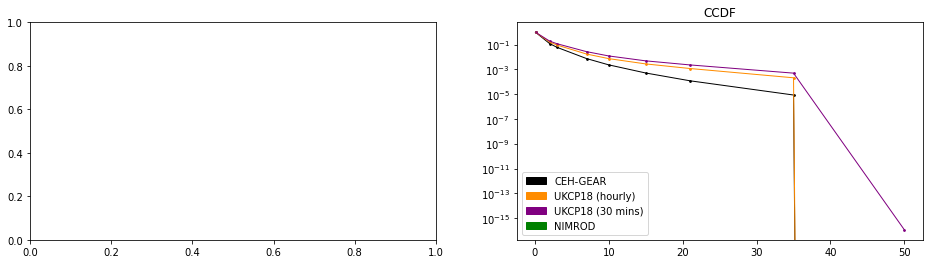

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
# axs[0].scatter(cehgear_bin_edges, cehgear_cdf ,linewidth = 1,s=3, color = 'black')
# axs[0].plot(cehgear_bin_edges,cehgear_cdf ,linewidth = 1, color = 'black')
# axs[0].scatter(ukcp18_hrly_bin_edges, ukcp18_hrly_cdf ,linewidth = 1,s=3, color = 'darkorange')
# axs[0].plot(ukcp18_hrly_bin_edges,ukcp18_hrly_cdf ,linewidth = 1, color = 'darkorange')
# axs[0].scatter(ukcp18_30mins_bin_edges, ukcp18_30mins_cdf ,linewidth = 1,s=3, color = 'purple')
# axs[0].plot(ukcp18_30mins_bin_edges,ukcp18_30mins_cdf ,linewidth = 1, color = 'purple')
# axs[0].scatter(nimrod_bin_edges, nimrod_cdf ,linewidth = 1,s=3, color = 'green')
# axs[0].plot(nimrod_bin_edges, nimrod_cdf ,linewidth = 1, color = 'green')
# axs[0].set_title('CDF')

axs[1].scatter(cehgear_bin_edges, cehgear_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(cehgear_bin_edges,cehgear_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(ukcp18_hrly_bin_edges, ukcp18_hrly_ccdf ,linewidth = 1,s=3, color = 'darkorange')
axs[1].plot(ukcp18_hrly_bin_edges,ukcp18_hrly_ccdf ,linewidth = 1, color = 'darkorange')
axs[1].scatter(ukcp18_30mins_bin_edges, ukcp18_30mins_ccdf ,linewidth = 1,s=3, color = 'purple')
axs[1].plot(ukcp18_30mins_bin_edges,ukcp18_30mins_ccdf ,linewidth = 1, color = 'purple')
axs[1].set_yscale('log')
# axs[1].set_xlim(0,80)
# axs[1].set_ylim(1e-7,1)
axs[1].set_title('CCDF')

axs[1].legend(handles=patches);

## All

In [ ]:
ukcp18_hrly_2001_2019_jja_GB_2km_results = calculate_ccdf_wetvalues(ukcp18_hrly_2001_2019_jja_GB_2km,bins_i_want)
ukcp18_30m_2001_2019_jja_GB_2km_results = calculate_ccdf_wetvalues(ukcp18_30m_2001_2019_jja_GB_2km, bins_i_want)
# NIMROD_2006_2019_jja_GB_2km_results = calculate_ccdf_wetvalues(NIMROD_2006_2019_jja_GB_2km,bins_i_want)
# cehgear_1990_2014_GB_jja_2km_results  = calculate_ccdf_wetvalues(cehgear_1990_2014_GB_jja_2km, bins_i_want)

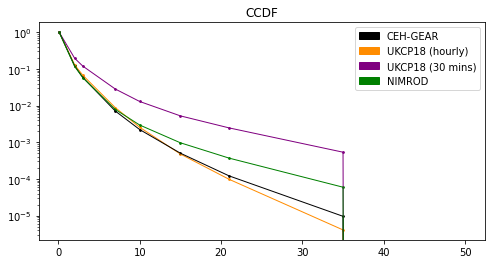

In [30]:
fig, ax = plt.subplots(figsize=(8,4))

results = [ukcp18_hrly_2006_2019_jja_GB_2km_results, ukcp18_30m_2006_2019_jja_GB_2km_results,cehgear_1990_2014_GB_jja_2km_results,NIMROD_2006_2019_jja_GB_2km_results]
colors = ['darkorange', 'purple', 'black', 'green']
plot_ccdf(ax,results, colors)

ax.set_yscale('log')
ax.set_title('CCDF')
ax.legend(handles=patches);

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

results = [ukcp18_hrly_2006_2019_jja_GB_2km_results, ukcp18_30m_2006_2019_jja_GB_2km_results,cehgear_1990_2014_GB_jja_2km_results,NIMROD_2006_2019_jja_GB_2km_results]
colors = ['darkorange', 'purple', 'black', 'green']
plot_ccdf(ax,results, colors)

ax.set_yscale('log')
ax.set_title('CCDF')
ax.legend(handles=patches);